# EE475 Group Project : Machine Learning Based Face Mask Recognition
JiaqiGuo: JGR9647; ManzhuWang: MWU2863; XinyiSu: XSY0714; ChenxiLiu: CLS9757

As the COVID-19 has brought great disaster to human beings, personal protection has become particularly important. For the purpose of controlling the spread of the epidemic, every one of us has the obligation and responsibility to wear masks. The objective of our project is to proposed a system that can monitor people’s mask wearing status (Correct, Incorrect and No mask). In our project, we reduce the dimension of input data space by using pre-processing methods: convert into gray image, Histogram of Oriented Gradients algorithm and Canny edge detector algorithm. We firstly implement linear model from scratch, then implement SVM, Decision Tree and Random Forest using scikit learn library. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm as svm
import sklearn.tree as tree
import sklearn.ensemble as ensemble
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from lib_fun import *
from skimage.feature import hog

X shape: (4559, 20, 20, 3), Y shape: (4559,)
X shape: (4559, 50, 50, 3), Y shape: (4559,)
X shape: (4559, 100, 100, 3), Y shape: (4559,)


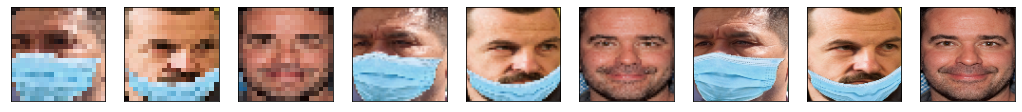

In [4]:
# Load the original face mask data with pixel of 20*20, 50*50 and 100*100
# We visulaize these image of Correct, Incorrect and No mask with each resolution.
data20, labels20 = load('../Data/Pixel20/')
data50, labels50 = load('../Data/Pixel50/')
data100, labels100 = load('../Data/Pixel100/')
VisualizeRGB(data20, data50, data100)

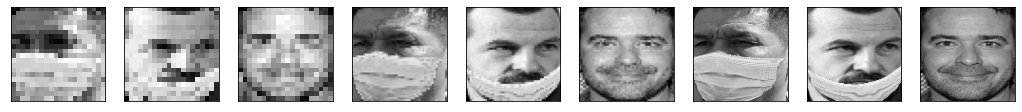

In [5]:
# In order to reduce the input dimension and keep critical information, we transfer the RGB image to gray image
data20_gray = RGBtoGray(data20)
data50_gray = RGBtoGray(data50)
data100_gray = RGBtoGray(data100)
VisualizeGray(data20_gray, data50_gray, data100_gray)

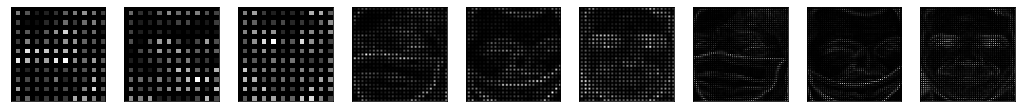

In [6]:
# Using Histogram of Oriented Gradients to extract features from RGB image
# Compute 8 direction in each 2*2 pixel
data20_hog = RGBtoHOG(data20)
data50_hog = RGBtoHOG(data50)
data100_hog = RGBtoHOG(data100)
VisualizeGray(data20_hog, data50_hog, data100_hog)

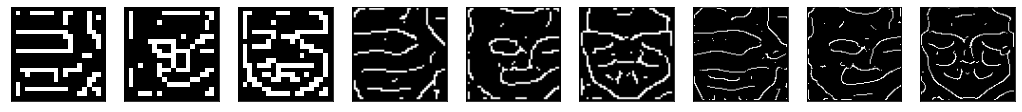

In [7]:
# Using Canny edge detector to extract features from gray image
data20_edge = GRAYtoEDGE(data20_gray, sigma=1)
data50_edge = GRAYtoEDGE(data50_gray, sigma=3)
data100_edge = GRAYtoEDGE(data100_gray, sigma=5)
VisualizeGray(data20_edge, data50_edge, data100_edge)

In [8]:
# Training process using different model. Split the data into training : test = 4 : 1.
# Flatten the image as the input data of model
def train_model(model, data, labels):
    x = Flatten(data) 
    x_train, x_test , y_train, y_test = train_test_split(x, labels, test_size = 0.2, random_state=1)
    clf = make_pipeline( StandardScaler(), model)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    print('accuracy: ', metrics.accuracy_score(y_test, pred)) 
    confusion = metrics.confusion_matrix(y_test, pred)
    return confusion

Firstly We implement one vs rest SVM model. SVM maps training examples to points in space so as to maximise the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.
As we are using a soft margin SVM, we set the penalty term C as 1. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. And we are using a kernel function to map the input features to a higher dimension space. In this experiment, we compare the linear, polynomial and rbf kernel. 
We choose gray and hog data as out training data in this experiment.


accuracy:  0.7905701754385965
accuracy:  0.7324561403508771
accuracy:  0.7214912280701754


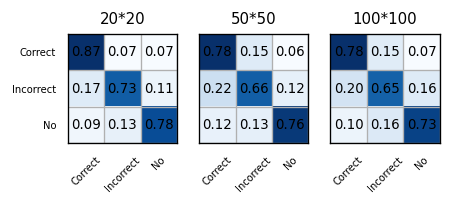

In [9]:
# SVM with linear kernel, using gray images as data.
confusion20 = train_model(svm.SVC(C=1, kernel='linear', cache_size=4000), data20_gray, labels20)
confusion50 = train_model(svm.SVC(C=1, kernel='linear', cache_size=4000), data50_gray, labels50)
confusion100 = train_model(svm.SVC(C=1, kernel='linear', cache_size=4000), data100_gray, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

It is not difficult to find that with the increase of image size, the accuracy of our model even decreases, which is very counterintuitive.

accuracy:  0.8125
accuracy:  0.7521929824561403
accuracy:  0.8004385964912281


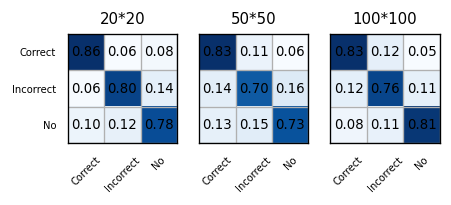

In [10]:
# SVM with linear kernel, using hog images as data.
confusion20 = train_model(svm.SVC(C=1, kernel='linear', cache_size=4000), data20_hog, labels20)
confusion50 = train_model(svm.SVC(C=1, kernel='linear', cache_size=4000), data50_hog, labels50)
confusion100 = train_model(svm.SVC(C=1, kernel='linear', cache_size=4000), data100_hog, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

Although the classification accuracy was slightly improved after the HoG feature was used, the overall performance of the model was still unsatisfactory, which indicates that Linear kernel has reached its performance limit, and we must find an alternative methodology to replace it.

accuracy:  0.868421052631579
accuracy:  0.875
accuracy:  0.8739035087719298


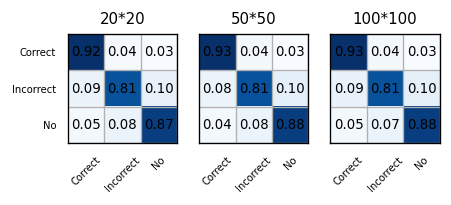

In [11]:
# SVM with 3 degree polynomial kernel, using gray images as data.
confusion20 = train_model(svm.SVC(C=1, kernel='poly', degree=3, cache_size=4000), data20_gray, labels20)
confusion50 = train_model(svm.SVC(C=1, kernel='poly', degree=3, cache_size=4000), data50_gray, labels50)
confusion100 = train_model(svm.SVC(C=1, kernel='poly', degree=3, cache_size=4000), data100_gray, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

Here we introduced the 3 degree class polynomial kernel. As can be seen from the figure below, the classification accuracy of all categories has been significantly improved.

accuracy:  0.8530701754385965
accuracy:  0.8464912280701754
accuracy:  0.8037280701754386


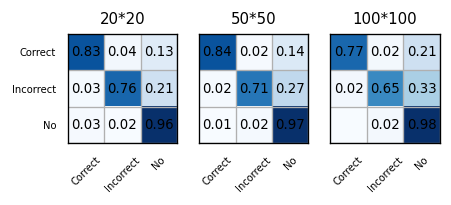

In [12]:
# SVM with 3 degree polynomial kernel, using hog images as data.
confusion20 = train_model(svm.SVC(C=1, kernel='poly', degree=3, cache_size=4000), data20_hog, labels20)
confusion50 = train_model(svm.SVC(C=1, kernel='poly', degree=3, cache_size=4000), data50_hog, labels50)
confusion100 = train_model(svm.SVC(C=1, kernel='poly', degree=3, cache_size=4000), data100_hog, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

Different from the previous control groups, when we replaced gray graphics with Hog features, the classification accuracy did not significantly improve

accuracy:  0.8859649122807017
accuracy:  0.8914473684210527
accuracy:  0.8903508771929824


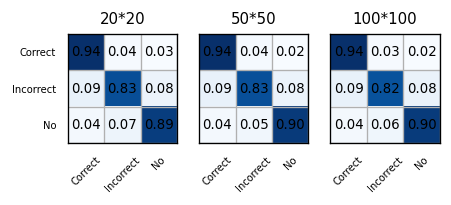

In [13]:
# SVM with rbf kernel, using gray images as data. Beta is set to 1 / n_features.
confusion20 = train_model(svm.SVC(C=1, kernel='rbf', gamma='auto', cache_size=4000), data20_gray, labels20)
confusion50 = train_model(svm.SVC(C=1, kernel='rbf', gamma='auto', cache_size=4000), data50_gray, labels50)
confusion100 = train_model(svm.SVC(C=1, kernel='rbf', gamma='auto', cache_size=4000), data100_gray, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

accuracy:  0.8530701754385965
accuracy:  0.8728070175438597
accuracy:  0.8607456140350878


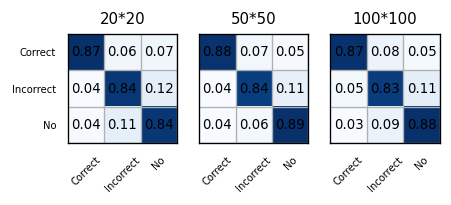

In [22]:
# SVM with rbf kernel, using hog images as data. Beta is set to 1 / n_features.
confusion20 = train_model(svm.SVC(C=1, kernel='rbf', gamma='auto', cache_size=4000), data20_hog, labels20)
confusion50 = train_model(svm.SVC(C=1, kernel='rbf', gamma='auto', cache_size=4000), data50_hog, labels50)
confusion100 = train_model(svm.SVC(C=1, kernel='rbf', gamma='auto', cache_size=4000), data100_hog, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

Finally, we test the effect of RBF kernel. Compared with linear kernel, both RBF kernel and POLY kernel can significantly improve the effect of the model. Meanwhile, when gray Scale image(50×50) was used as the input, we obtained the highest accuracy of the SVM model of 89.1%

In this experiment,  we can see that the result of rbf kernel is better than polynomial, which is better than linear kernel. The hog method lead to worse results using each kernel function. The reason is that models need more information other than edge information to make right decision.The most interesting thing we can see is that, the highest resolution of image doesn't produce the best results. The reason may be that it is harder for SVM to split high dimension data space.

The next model we choose is decision tree. Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.
In our setting, the maximum depth of the tree is nor specified, nodes are expanded until all leaves are pure or until all leaves contain less than 2 samples.
And we compare the results of using gray, hog and canny dataset. 

accuracy:  0.7993421052631579
accuracy:  0.793859649122807
accuracy:  0.7828947368421053


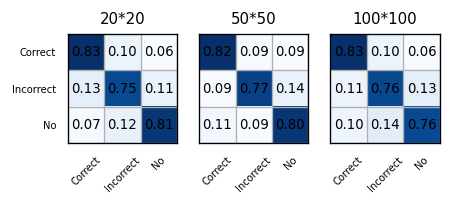

In [15]:
# Decision Tree on gray image.
confusion20 = train_model(tree.DecisionTreeClassifier(), data20_gray, labels20)
confusion50 = train_model(tree.DecisionTreeClassifier(), data50_gray, labels50)
confusion100 = train_model(tree.DecisionTreeClassifier(), data100_gray, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

accuracy:  0.7675438596491229
accuracy:  0.7467105263157895
accuracy:  0.7039473684210527


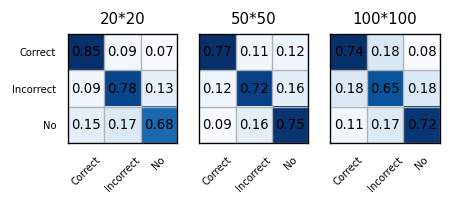

In [16]:
# Decision Tree on hog image.
confusion20 = train_model(tree.DecisionTreeClassifier(), data20_hog, labels20)
confusion50 = train_model(tree.DecisionTreeClassifier(), data50_hog, labels50)
confusion100 = train_model(tree.DecisionTreeClassifier(), data100_hog, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

accuracy:  0.5098684210526315
accuracy:  0.5603070175438597
accuracy:  0.4857456140350877


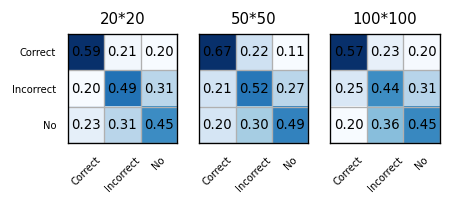

In [17]:
# Decision Tree on canny image.
confusion20 = train_model(tree.DecisionTreeClassifier(), data20_edge, labels20)
confusion50 = train_model(tree.DecisionTreeClassifier(), data50_edge, labels50)
confusion100 = train_model(tree.DecisionTreeClassifier(), data100_edge, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

We can find that hog extractor has bad influence on the results, while the result of Canny extractor are even worse. 

To further enhance the classification accuracy, we try the random forest algorithm. The Random forest is a special estimator that fits a certain number of single trees on various sub-samples of the dataset and uses averaging to improve the classification accuracy and control the situation of over-fitting. In our setting, The maximum depth of the tree is nor specified, nodes are expanded until all leaves are pure or until all leaves contain less than 2 samples. And we compare the results of 5, 10 and 50 subtrees on only gray dataset.         

accuracy:  0.8410087719298246
accuracy:  0.8475877192982456
accuracy:  0.8464912280701754


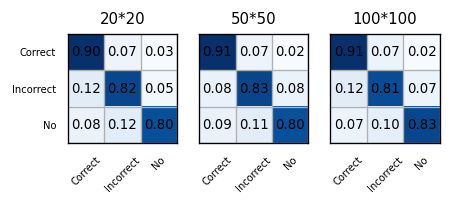

In [18]:
# Random Forest using 5 subtrees on gray image.
confusion20 = train_model(ensemble.RandomForestClassifier(n_estimators= 5), data20_gray, labels20)
confusion50 = train_model(ensemble.RandomForestClassifier(n_estimators= 5), data50_gray, labels50)
confusion100 = train_model(ensemble.RandomForestClassifier(n_estimators= 5), data100_gray, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

accuracy:  0.8640350877192983
accuracy:  0.8662280701754386
accuracy:  0.868421052631579


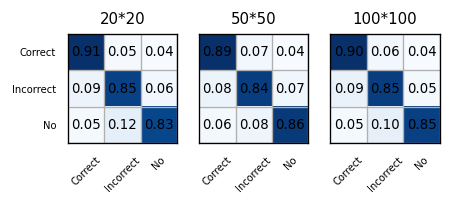

In [19]:
# Random Forest using 10 subtrees on gray image.
confusion20 = train_model(ensemble.RandomForestClassifier(n_estimators= 10), data20_gray, labels20)
confusion50 = train_model(ensemble.RandomForestClassifier(n_estimators= 10), data50_gray, labels50)
confusion100 = train_model(ensemble.RandomForestClassifier(n_estimators= 10), data100_gray, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

accuracy:  0.9002192982456141
accuracy:  0.8991228070175439
accuracy:  0.9013157894736842


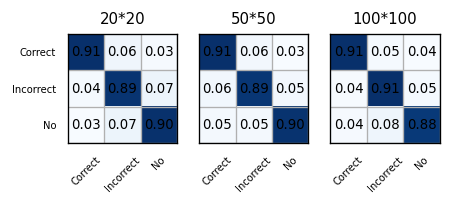

In [20]:
# Random Forest using 50 subtrees on gray image.
confusion20 = train_model(ensemble.RandomForestClassifier(n_estimators= 50), data20_gray, labels20)
confusion50 = train_model(ensemble.RandomForestClassifier(n_estimators= 50), data50_gray, labels50)
confusion100 = train_model(ensemble.RandomForestClassifier(n_estimators= 50), data100_gray, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

Since the growth of each tree in the random forest has grow to the maximum extent and has a certain degree of randomness, the performance and robustness of the overall model are largely improved when we integrate them together. We can see that random forest has higher accuarcy than a single tree, and the more subtress we use, the higher accuarcy we can gain.

Finally, instead of using scikit learn package, we implement a linear model from scratch. Linear classifier is a very common and efficient classification algorithm in machine learning. In this project we will compare its results as a baseline with the other three classification algorithms. Its result can be illustrated as below: